1. Fraud Customer Identification
2. Author: Sudesh Khillare
3. Dataset: Approved Application and Rejected Application

Approach:
1. Here, in Approved Application Dataset we have both good and bad customer loans. Target variable is Status. 1 means good loan and 0 means bad loan. Our primary goal will be trying to catch maximum 0 with better accuracy.
2. In Rejected Application Dataset, everyone is marked as 0, i.e. Bad Loan. I will try to identify potenrial good customer from whom we could have earned interest with lower risk.
3. I will train and test my machine learning model in Approved Dataset and use same model for making prediction on Rejected Application to identify potential good customers.
4. I am generating binary prediction also probabiliy values. Thus if business is having some another model based on this or decided to set the threshold value to higher or lower, then this probability will be useful.
5. Finally I'm generating cost based impact.
6. I have also tried implementing Neural Network for more optimized results.

In [106]:
#Importing all the required Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib 
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from imblearn.over_sampling import ADASYN
import random
import warnings
warnings.filterwarnings('ignore')

# 1. Data Import

In [2]:
#Importing both the dataset
Approved_Data=pd.read_excel('approved_application_data.xlsx',index_col=False,header = 1)
Rejected_Data=pd.read_excel("rejected_application_data.xlsx",index_col=False,header = 1)

#Removing Index Column
del Approved_Data['Unnamed: 0']
del Rejected_Data['Unnamed: 0']

In [3]:
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,title_loan,pay_advances,total_loan_payments,no_of_other_active_loans,traditional_single_payment_mean,traditional_single_payment_trend,loan_amount,loan_requested,state,status
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,0.0,150.0,150.0,2,0.0,0.0,90,90,"""CA""",1
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,0.0,0.0,0.0,2,0.0,0.0,100,255,"""CA""",1
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,0.0,0.0,0.0,0,0.0,0.0,300,500,"""WA""",1
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0.0,0.0,0.0,0,0.0,0.0,150,350,"""WA""",0
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,0.0,0.0,0.0,0,0.0,0.0,100,500,"""WA""",0


In [4]:
Rejected_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,title_loan,pay_advances,total_loan_payments,no_of_other_active_loans,traditional_single_payment_mean,traditional_single_payment_trend,loan_amount,loan_requested,state,status
0,952.00,0.0000,238.0,0.0000,0.0,0.0,0.000,180,5.0,1,...,0.0,0.0,0.0,0,0.0,0.0,200,200,"""CA""",0
1,0.00,0.0000,0.0,0.0000,0.0,0.0,0.000,0,0.0,0,...,0.0,0.0,72.0,1,9.0,0.0,500,500,"""UT""",0
2,2095.94,0.0000,0.0,0.0000,0.0,0.0,523.985,9,3.0,1,...,0.0,0.0,0.0,0,0.0,0.0,300,300,"""WA""",0
3,7368.99,0.0000,5.0,1837.2475,0.0,0.0,0.000,177,5.5,3,...,0.0,0.0,0.0,1,0.0,0.0,255,255,"""CA""",0
4,2178.57,311.1425,233.5,0.0000,0.0,0.0,0.000,54,18.5,2,...,0.0,0.0,250.0,1,0.0,0.0,250,250,"""WA""",0


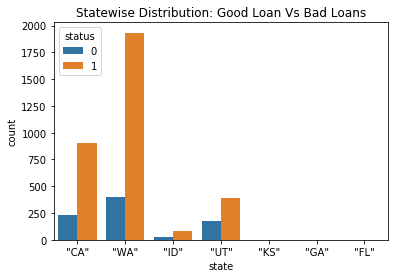

In [5]:
# Checking Statewise Distribution of Good and Bad Loans
#This is to identify top areas of operation for Client
sb.countplot(x ="state",hue="status", data = Approved_Data) 
plt.title("Statewise Distribution: Good Loan Vs Bad Loans")
plt.show()

In [6]:
#Label Encoding Categorical Variable: State
from sklearn.preprocessing  import LabelEncoder
def MultilabelEncoder(ColumnList, DataFrame):
    for i in ColumnList:
        labelencoder_x=LabelEncoder()
        DataFrame[i]=labelencoder_x.fit_transform(DataFrame[i].astype(str))
        
        
ColumnList=['state']
MultilabelEncoder(ColumnList,Approved_Data)
MultilabelEncoder(ColumnList,Rejected_Data)

In [7]:
print("Looking for Missing Values and Data Types in both the Dataset\n")
print(Approved_Data.info())
print(Rejected_Data.info())

Looking for Missing Values and Data Types in both the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145 entries, 0 to 4144
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   monthly_income                     4145 non-null   float64
 1   gig_economy_weekly_income          4145 non-null   float64
 2   atm_check_deposits_weekly_income   4145 non-null   float64
 3   direct_deposit_weekly_income       4145 non-null   float64
 4   government_aid_weekly_income       4145 non-null   float64
 5   frequency_heuristic_weekly_income  4145 non-null   float64
 6   large_deposits_weekly_income       4145 non-null   float64
 7   income_length                      4145 non-null   int64  
 8   payrolls_per_month                 4145 non-null   float64
 9   income_sources                     4145 non-null   int64  
 10  days_since_most_recent_payroll     4145 non-null   int64 

No missing values in both the datasets.

# 2. Feature Engineering

Generating different set of features and selecting the final ones after looking at correlation value with Target Variables 

In [8]:
def Percent_Amount_Approved(loan_amount,loan_requested):
    output=loan_amount/loan_requested
    return output
Approved_Data['Percent_Amount_Approved']=Approved_Data.apply(lambda x: Percent_Amount_Approved(x.loan_amount,x.loan_requested),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,pay_advances,total_loan_payments,no_of_other_active_loans,traditional_single_payment_mean,traditional_single_payment_trend,loan_amount,loan_requested,state,status,Percent_Amount_Approved
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,150.0,150.0,2,0.0,0.0,90,90,0,1,1.000000
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,0.0,0.0,2,0.0,0.0,100,255,0,1,0.392157
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,0.0,0.0,0,0.0,0.0,300,500,6,1,0.600000
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0.0,0.0,0,0.0,0.0,150,350,6,0,0.428571
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,0.0,0.0,0,0.0,0.0,100,500,6,0,0.200000


In [9]:
def Total_Debt_To_Income(monthly_income,total_loan_payments):
    
    if monthly_income==0:
        return 1
    else:
        return total_loan_payments/monthly_income
        
Approved_Data['Total_Debt_To_Income']=Approved_Data.apply(lambda x: Total_Debt_To_Income(x.monthly_income,x.total_loan_payments),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,total_loan_payments,no_of_other_active_loans,traditional_single_payment_mean,traditional_single_payment_trend,loan_amount,loan_requested,state,status,Percent_Amount_Approved,Total_Debt_To_Income
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,150.0,2,0.0,0.0,90,90,0,1,1.000000,0.170176
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,0.0,2,0.0,0.0,100,255,0,1,0.392157,0.000000
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,0.0,0,0.0,0.0,300,500,6,1,0.600000,1.000000
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0.0,0,0.0,0.0,150,350,6,0,0.428571,0.000000
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,0.0,0,0.0,0.0,100,500,6,0,0.200000,0.000000


In [10]:
def Overdraft_NSF_Flag(overdraft_transactions,nsf_transactions):
    if overdraft_transactions>0 or nsf_transactions>0:
        return 1
    else:
        return 0
Approved_Data['Overdraft_NSF_Flag']=Approved_Data.apply(lambda x: Overdraft_NSF_Flag(x.overdraft_transactions,x.nsf_transactions),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,no_of_other_active_loans,traditional_single_payment_mean,traditional_single_payment_trend,loan_amount,loan_requested,state,status,Percent_Amount_Approved,Total_Debt_To_Income,Overdraft_NSF_Flag
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,2,0.0,0.0,90,90,0,1,1.000000,0.170176,0
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,2,0.0,0.0,100,255,0,1,0.392157,0.000000,0
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,0,0.0,0.0,300,500,6,1,0.600000,1.000000,0
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0,0.0,0.0,150,350,6,0,0.428571,0.000000,0
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,0,0.0,0.0,100,500,6,0,0.200000,0.000000,1


In [11]:
def Avg_Income_By_Per_Source(monthly_income,income_sources):
    if income_sources!=0:
        return monthly_income/income_sources
    else:
        return 0

Approved_Data['Avg_Income_By_Per_Source']=Approved_Data.apply(lambda x: Avg_Income_By_Per_Source(x.monthly_income,x.income_sources),axis=1)

Approved_Data.fillna(0)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,traditional_single_payment_mean,traditional_single_payment_trend,loan_amount,loan_requested,state,status,Percent_Amount_Approved,Total_Debt_To_Income,Overdraft_NSF_Flag,Avg_Income_By_Per_Source
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,0.0,0.0,90,90,0,1,1.000000,0.170176,0,881.44
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,0.0,0.0,100,255,0,1,0.392157,0.000000,0,806.19
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,0.0,0.0,300,500,6,1,0.600000,1.000000,0,0.00
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0.0,0.0,150,350,6,0,0.428571,0.000000,0,1510.51
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,0.0,0.0,100,500,6,0,0.200000,0.000000,1,124.00


In [12]:
def Biweekly_Candidate(days_since_most_recent_payroll,days_until_next_payroll):
    if days_since_most_recent_payroll>= 0 and days_since_most_recent_payroll<8 and days_until_next_payroll>=0 and days_until_next_payroll<8:
        return 1
    else:
        return 0
    
Approved_Data['Biweekly_Candidate']=Approved_Data.apply(lambda x: Biweekly_Candidate(x.days_since_most_recent_payroll,x.days_until_next_payroll),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,traditional_single_payment_trend,loan_amount,loan_requested,state,status,Percent_Amount_Approved,Total_Debt_To_Income,Overdraft_NSF_Flag,Avg_Income_By_Per_Source,Biweekly_Candidate
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,0.0,90,90,0,1,1.000000,0.170176,0,881.44,1
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,0.0,100,255,0,1,0.392157,0.000000,0,806.19,1
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,0.0,300,500,6,1,0.600000,1.000000,0,0.00,0
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0.0,150,350,6,0,0.428571,0.000000,0,1510.51,0
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,0.0,100,500,6,0,0.200000,0.000000,1,124.00,0


In [13]:
def Mortgage_Flag(mortgage):
    if mortgage>0:
        return 1
    else:
        return 0
    
Approved_Data['Mortgage_Flag']=Approved_Data.apply(lambda x: Mortgage_Flag(x.mortgage),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,loan_amount,loan_requested,state,status,Percent_Amount_Approved,Total_Debt_To_Income,Overdraft_NSF_Flag,Avg_Income_By_Per_Source,Biweekly_Candidate,Mortgage_Flag
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,90,90,0,1,1.000000,0.170176,0,881.44,1,0
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,100,255,0,1,0.392157,0.000000,0,806.19,1,0
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,300,500,6,1,0.600000,1.000000,0,0.00,0,0
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,150,350,6,0,0.428571,0.000000,0,1510.51,0,0
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,100,500,6,0,0.200000,0.000000,1,124.00,0,0


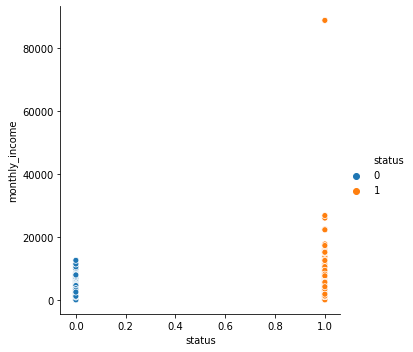

In [14]:
#Analyzing Monthly Income w.r.t. Status
sb.relplot(x="status", y="monthly_income", hue="status",
            data=Approved_Data);

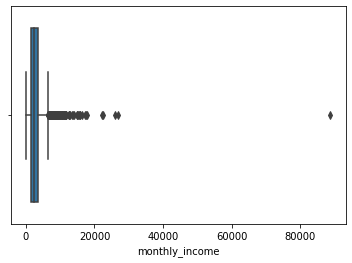

In [15]:
ax = sb.boxplot(x=Approved_Data["monthly_income"])

From Scatterplot, we can analyze that most defaulter are in lower salary income. Also from Box Plot, it is evident that data is full with outliers. Thus creating Bins for Monthly Income mainly focusing on lower income part.

In [16]:
Monthly_Income_Mean=Approved_Data['monthly_income'].mean()

def Monthly_Income_Bins(monthly_income):
    output=0
    if monthly_income<Monthly_Income_Mean/2:
        output=0
    elif monthly_income>=Monthly_Income_Mean/2 and monthly_income<Monthly_Income_Mean:
        output=2
    elif monthly_income>=(Monthly_Income_Mean/2)*3 and monthly_income<Monthly_Income_Mean*2:
        output=3
    else :
        output=4   
    return output

Approved_Data['Monthly_Income_Bins']=Approved_Data.apply(lambda x: Monthly_Income_Bins(x.monthly_income),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,loan_requested,state,status,Percent_Amount_Approved,Total_Debt_To_Income,Overdraft_NSF_Flag,Avg_Income_By_Per_Source,Biweekly_Candidate,Mortgage_Flag,Monthly_Income_Bins
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,90,0,1,1.000000,0.170176,0,881.44,1,0,0
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,255,0,1,0.392157,0.000000,0,806.19,1,0,2
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,500,6,1,0.600000,1.000000,0,0.00,0,0,0
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,350,6,0,0.428571,0.000000,0,1510.51,0,0,2
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,500,6,0,0.200000,0.000000,1,124.00,0,0,0


In [17]:
#Looking for lower income bins and income length for 60 days. (Assumption is Income Length is in days)
def Low_Income_Salaried_Customer(Monthly_Income_Bins,income_length):
    if Monthly_Income_Bins==0 and income_length>60:
        return 1
    else:
        return 0

Approved_Data['Low_Income_Salaried_Customer']=Approved_Data.apply(lambda x: Low_Income_Salaried_Customer(x.Monthly_Income_Bins,x.income_length),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,state,status,Percent_Amount_Approved,Total_Debt_To_Income,Overdraft_NSF_Flag,Avg_Income_By_Per_Source,Biweekly_Candidate,Mortgage_Flag,Monthly_Income_Bins,Low_Income_Salaried_Customer
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,0,1,1.000000,0.170176,0,881.44,1,0,0,1
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,0,1,0.392157,0.000000,0,806.19,1,0,2,0
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,6,1,0.600000,1.000000,0,0.00,0,0,0,0
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,6,0,0.428571,0.000000,0,1510.51,0,0,2,0
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,6,0,0.200000,0.000000,1,124.00,0,0,0,1


In [18]:
#Checking if customer bank balance is less than sanctioned loan amount
def Balance_Low_Than_Loan(loan_amount,bank_balance):
    if loan_amount>bank_balance:
        return 1
    else:
        return 0

Approved_Data['Balance_Low_Than_Loan']=Approved_Data.apply(lambda x: Balance_Low_Than_Loan(x.loan_amount,x.bank_balance),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,status,Percent_Amount_Approved,Total_Debt_To_Income,Overdraft_NSF_Flag,Avg_Income_By_Per_Source,Biweekly_Candidate,Mortgage_Flag,Monthly_Income_Bins,Low_Income_Salaried_Customer,Balance_Low_Than_Loan
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,1,1.000000,0.170176,0,881.44,1,0,0,1,1
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,1,0.392157,0.000000,0,806.19,1,0,2,0,1
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,1,0.600000,1.000000,0,0.00,0,0,0,0,1
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0,0.428571,0.000000,0,1510.51,0,0,2,0,1
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,0,0.200000,0.000000,1,124.00,0,0,0,1,1


In [19]:
#Checking if Bank Balance is less than monthly income
def Balance_Low_Than_Income(monthly_income,bank_balance):
    if monthly_income>bank_balance:
        return 1
    else:
        return 0

Approved_Data['Balance_Low_Than_Income']=Approved_Data.apply(lambda x: Balance_Low_Than_Income(x.monthly_income,x.bank_balance),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,Percent_Amount_Approved,Total_Debt_To_Income,Overdraft_NSF_Flag,Avg_Income_By_Per_Source,Biweekly_Candidate,Mortgage_Flag,Monthly_Income_Bins,Low_Income_Salaried_Customer,Balance_Low_Than_Loan,Balance_Low_Than_Income
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,1.000000,0.170176,0,881.44,1,0,0,1,1,1
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,0.392157,0.000000,0,806.19,1,0,2,0,1,1
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,0.600000,1.000000,0,0.00,0,0,0,0,1,0
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0.428571,0.000000,0,1510.51,0,0,2,0,1,1
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,0.200000,0.000000,1,124.00,0,0,0,1,1,1


In [20]:
#Flagging customer if he is having bank balance less than both, Loan Amount as well as Monthly Salary
def Potential_Risky_Customer(Balance_Low_Than_Income,Balance_Low_Than_Loan):
    if Balance_Low_Than_Income==1 and Balance_Low_Than_Loan==1:
        return 1
    else:
        return 0

Approved_Data['Potential_Risky_Customer']=Approved_Data.apply(lambda x: Potential_Risky_Customer(x.Balance_Low_Than_Loan,x.Balance_Low_Than_Income),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,Total_Debt_To_Income,Overdraft_NSF_Flag,Avg_Income_By_Per_Source,Biweekly_Candidate,Mortgage_Flag,Monthly_Income_Bins,Low_Income_Salaried_Customer,Balance_Low_Than_Loan,Balance_Low_Than_Income,Potential_Risky_Customer
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,0.170176,0,881.44,1,0,0,1,1,1,1
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,0.000000,0,806.19,1,0,2,0,1,1,1
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,1.000000,0,0.00,0,0,0,0,1,0,0
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0.000000,0,1510.51,0,0,2,0,1,1,1
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,0.000000,1,124.00,0,0,0,1,1,1,1


In [21]:
#This feature will generate an idea about wages he is getting on an average 
def Avg_Salary_Per_Source(monthly_income,income_sources):
    output=0
    if income_sources==0 or monthly_income==0:
        return output
    else:
        output=monthly_income/income_sources
    return output

Approved_Data['Avg_Salary_Per_Source']=Approved_Data.apply(lambda x: Avg_Salary_Per_Source(x.monthly_income,x.income_sources),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,Overdraft_NSF_Flag,Avg_Income_By_Per_Source,Biweekly_Candidate,Mortgage_Flag,Monthly_Income_Bins,Low_Income_Salaried_Customer,Balance_Low_Than_Loan,Balance_Low_Than_Income,Potential_Risky_Customer,Avg_Salary_Per_Source
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,0,881.44,1,0,0,1,1,1,1,881.44
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,0,806.19,1,0,2,0,1,1,1,806.19
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,0,0.00,0,0,0,0,1,0,0,0.00
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0,1510.51,0,0,2,0,1,1,1,1510.51
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,1,124.00,0,0,0,1,1,1,1,124.00


In [22]:
def Monthly_Window_Less_Paid_Cust(days_since_most_recent_payroll,days_until_next_payroll,loan_requested,loan_amount):
    output=0
    if days_since_most_recent_payroll>=0 and days_since_most_recent_payroll<=15:
        if days_until_next_payroll<=15:
            if loan_requested>loan_amount:
                output=1
    return output

Approved_Data['Monthly_Window_Less_Paid_Cust']=Approved_Data.apply(lambda x: Monthly_Window_Less_Paid_Cust(x.days_since_most_recent_payroll,x.days_until_next_payroll,x.loan_requested,x.loan_amount),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,Avg_Income_By_Per_Source,Biweekly_Candidate,Mortgage_Flag,Monthly_Income_Bins,Low_Income_Salaried_Customer,Balance_Low_Than_Loan,Balance_Low_Than_Income,Potential_Risky_Customer,Avg_Salary_Per_Source,Monthly_Window_Less_Paid_Cust
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,881.44,1,0,0,1,1,1,1,881.44,0
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,806.19,1,0,2,0,1,1,1,806.19,1
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,0.00,0,0,0,0,1,0,0,0.00,0
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,1510.51,0,0,2,0,1,1,1,1510.51,1
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,124.00,0,0,0,1,1,1,1,124.00,1


In [23]:
def Threshold_Cust(monthly_income,bank_balance,total_loan_payments):
    output=0
    if monthly_income+bank_balance<total_loan_payments:
        output=1
    return output

Approved_Data['Threshold_Cust']=Approved_Data.apply(lambda x: Threshold_Cust(x.monthly_income,x.bank_balance,x.total_loan_payments),axis=1)
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,Biweekly_Candidate,Mortgage_Flag,Monthly_Income_Bins,Low_Income_Salaried_Customer,Balance_Low_Than_Loan,Balance_Low_Than_Income,Potential_Risky_Customer,Avg_Salary_Per_Source,Monthly_Window_Less_Paid_Cust,Threshold_Cust
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,1,0,0,1,1,1,1,881.44,0,0
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,1,0,2,0,1,1,1,806.19,1,0
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,0,0,0,0,1,0,0,0.00,0,0
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0,0,2,0,1,1,1,1510.51,1,0
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,0,0,0,1,1,1,1,124.00,1,0


1    3317
0     828
Name: status, dtype: int64


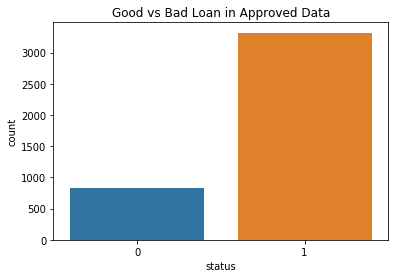

In [24]:
# Checking class imbalance of target variable.
print(Approved_Data['status'].value_counts())
sb.countplot(x ="status",data = Approved_Data) 
plt.title("Good vs Bad Loan in Approved Data")
plt.show()

# 3. Feature Selection and Preprocessing

In [25]:
Correlation_Matrix=Approved_Data.corr()
Correlation_Matrix['status'].sort_values()

Balance_Low_Than_Loan               -0.113873
Potential_Risky_Customer            -0.113235
Monthly_Window_Less_Paid_Cust       -0.084508
Low_Income_Salaried_Customer        -0.059647
loan_requested                      -0.059081
predatory_installment_loan          -0.055452
return_transactions                 -0.053948
Threshold_Cust                      -0.051592
no_of_other_active_loans            -0.026419
Balance_Low_Than_Income             -0.025002
Biweekly_Candidate                  -0.014299
reverse_transactions                -0.014282
overdraft_transactions              -0.014169
Total_Debt_To_Income                -0.013809
length_of_transaction_history       -0.013548
nsf_transactions                    -0.012143
traditional_single_payment          -0.008382
payrolls_per_month                  -0.002981
title_loan                          -0.001628
loan_amount                         -0.001520
large_deposits_weekly_income        -0.000496
government_aid_weekly_income      

As out label encoded variable, State is not having much of correlation with Status, I will drop this variable from my model building.

In [26]:
#Cheking mean, quantiles and max values to identify outliers in the dataset.
Approved_Data.describe()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,Biweekly_Candidate,Mortgage_Flag,Monthly_Income_Bins,Low_Income_Salaried_Customer,Balance_Low_Than_Loan,Balance_Low_Than_Income,Potential_Risky_Customer,Avg_Salary_Per_Source,Monthly_Window_Less_Paid_Cust,Threshold_Cust
count,4145.000000,4145.000000,4145.000000,4145.00000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,...,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000
mean,2795.329450,6.252843,68.887422,437.99492,9.712636,140.729628,35.254914,135.115561,4.072261,1.821230,...,0.328347,0.008444,2.241737,0.113148,0.720145,0.943788,0.675271,1679.696951,0.629674,0.016888
std,2500.304614,51.266176,184.837526,460.51468,67.448255,369.385895,241.904024,89.434786,4.337867,1.128403,...,0.469669,0.091513,1.436878,0.316812,0.448982,0.230359,0.468330,1335.563527,0.482950,0.128867
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1525.800000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,70.000000,2.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,872.740000,0.000000,0.000000
50%,2367.330000,0.000000,0.000000,391.38500,0.000000,0.000000,0.000000,144.000000,3.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1405.455000,1.000000,0.000000
75%,3519.960000,0.000000,50.000000,661.14250,0.000000,0.000000,0.000000,176.000000,4.833333,2.000000,...,1.000000,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000,2186.290000,1.000000,0.000000
max,88818.140000,1175.795000,2798.875000,6498.49250,1238.475000,10070.425000,10599.782500,452.000000,107.538095,17.000000,...,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,17763.628000,1.000000,1.000000


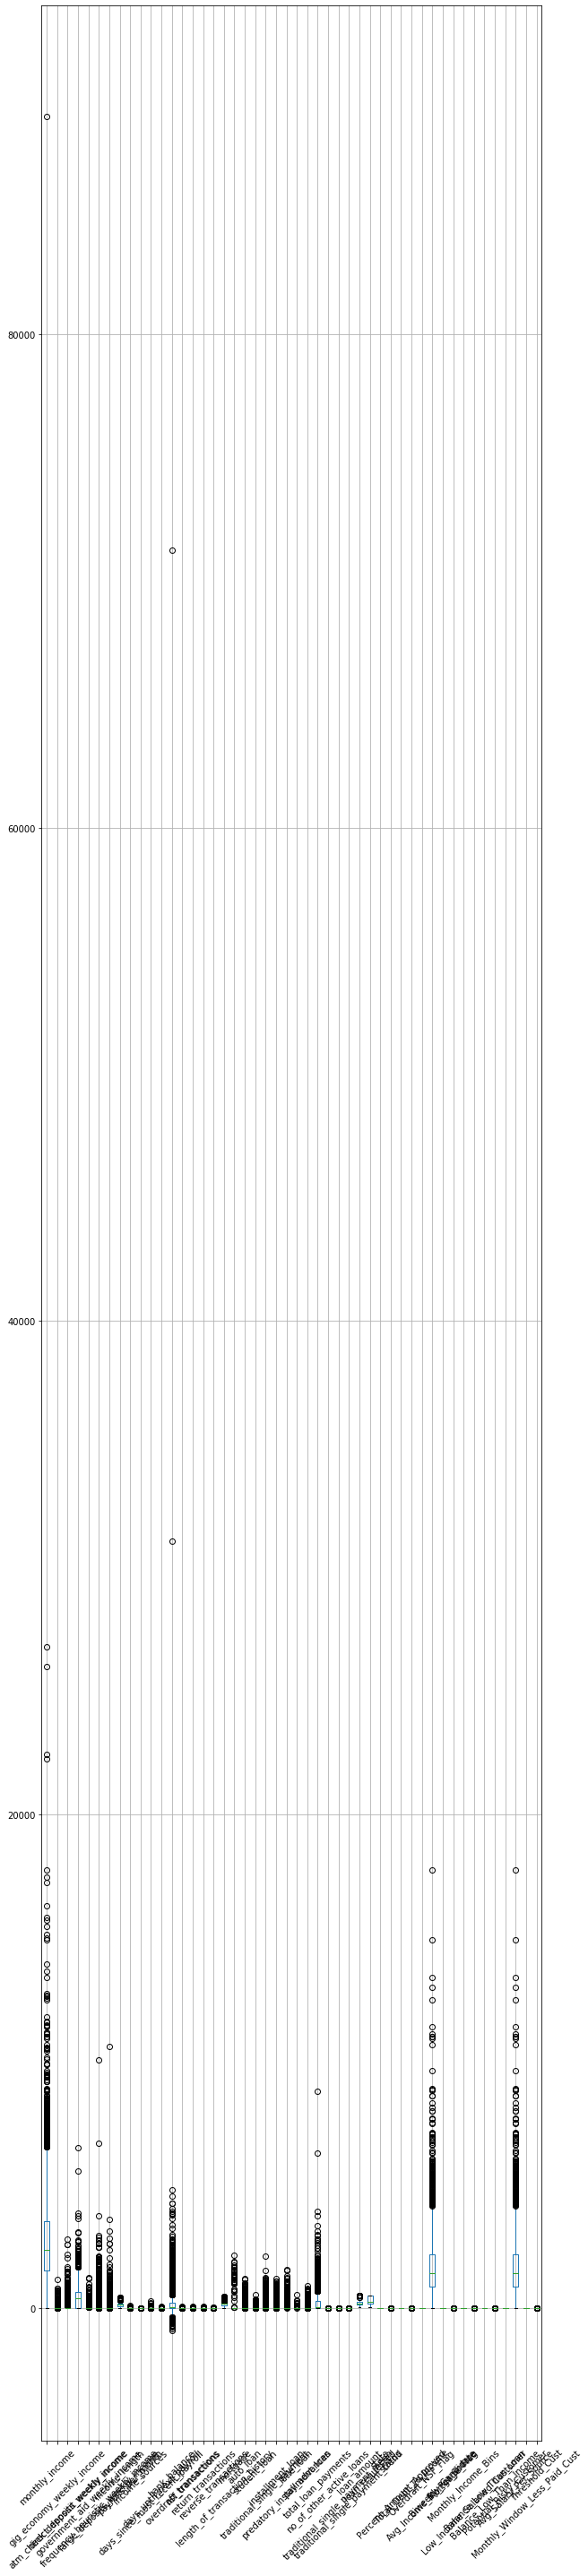

In [27]:
#Box Plot of all variable from the dataset.
rcParams['figure.figsize'] = 10, 50
boxplot = Approved_Data.boxplot(grid=True, rot=45, fontsize=10)
rcParams['figure.figsize'] = 6, 4

1. Above boxplot is of all the variables in the dataset. Though it is not very intuitive to understand the distribution for each variable but one can get and idea that dataset is full of outliers. 
2. All the new generated variable are mostly ratio or flags thus they don't much of outliers.
3. I will implement Standard Scalar to handle this problem. We need to perform standardization only on Independent Variables except categorical variables State.

In [28]:
#Saving Status as Dependent Variable and few other as Independent Variable. Here I'm checking correlation with Status Variable for selecting the Independent Variables.
X=Approved_Data[['Balance_Low_Than_Loan','Monthly_Window_Less_Paid_Cust','Low_Income_Salaried_Customer',
                'return_transactions','Threshold_Cust','bank_balance','Mortgage_Flag','Avg_Salary_Per_Source',
                'Monthly_Income_Bins','Avg_Income_By_Per_Source','Percent_Amount_Approved']]
Y=Approved_Data['status']

In [107]:
#Replacing inf and -inf values with nan and then replacing that with 0
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X=X.fillna(0)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145 entries, 0 to 4144
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Balance_Low_Than_Loan          4145 non-null   int64  
 1   Monthly_Window_Less_Paid_Cust  4145 non-null   int64  
 2   Low_Income_Salaried_Customer   4145 non-null   int64  
 3   return_transactions            4145 non-null   int64  
 4   Threshold_Cust                 4145 non-null   int64  
 5   bank_balance                   4145 non-null   float64
 6   Mortgage_Flag                  4145 non-null   int64  
 7   Avg_Salary_Per_Source          4145 non-null   float64
 8   Monthly_Income_Bins            4145 non-null   int64  
 9   Avg_Income_By_Per_Source       4145 non-null   float64
 10  Percent_Amount_Approved        4145 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 356.3 KB


In [31]:
#Scaling data with Standard Scalar before splitting in train and test dataset.
Stan_Scalar=StandardScaler()
X_Scaled = pd.DataFrame(Stan_Scalar.fit_transform(X),columns = X.columns)

In [32]:
X_Scaled.head()

,Balance_Low_Than_Loan,Monthly_Window_Less_Paid_Cust,Low_Income_Salaried_Customer,return_transactions,Threshold_Cust,bank_balance,Mortgage_Flag,Avg_Salary_Per_Source,Monthly_Income_Bins,Avg_Income_By_Per_Source,Percent_Amount_Approved
0,0.623386,-1.303965,2.799634,-0.240573,-0.131065,-0.163733,-0.092281,-0.597765,-1.560332,-0.597765,1.307754
1,0.623386,0.766892,-0.357189,0.190172,-0.131065,-0.171730,-0.092281,-0.654115,-0.168258,-0.654115,-1.071921
2,0.623386,-1.303965,-0.357189,-0.240573,-0.131065,-0.175837,-0.092281,-1.257821,-1.560332,-1.257821,-0.258226
3,0.623386,0.766892,-0.357189,-0.240573,-0.131065,-0.069851,-0.092281,-0.126694,-0.168258,-0.126694,-0.929360
4,0.623386,0.766892,2.799634,0.620917,-0.131065,-0.199500,-0.092281,-1.164965,-1.560332,-1.164965,-1.824205


In [33]:
#Dividing data in 70-30 split, keeping 30% data as holdout to test it against model.
#Using stratified sampling to keep same distribution for both Good and Bad Loans.
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled
                                                    , Y, test_size=0.3,stratify=Y, random_state=42)

In [34]:
#Using SMOTE Oversampling to handle the Data Balance.
ada = ADASYN(random_state=42)
X_res, Y_res = ada.fit_resample(X_Train, Y_Train)
print("Original Dataset Dimension:", X_Train.shape, "and", Y_Train.shape)
print("SMOTE Modified Dataset Dimension:", X_res.shape, "and", Y_res.shape)

Original Dataset Dimension: (2901, 11) and (2901,)
SMOTE Modified Dataset Dimension: (4605, 11) and (4605,)


# 4. Machine Learning Model Building

## 4.1 Random Forest Classifier 

In [35]:
Rand_For=RandomForestClassifier(oob_score=True,random_state=42)
Rand_For.fit(X_res,Y_res)
Y_Pred_Rand_For=Rand_For.predict(X_Test)

#Model Evaluation
print(classification_report(Y_Test,Y_Pred_Rand_For))
pd.crosstab(Y_Test,Y_Pred_Rand_For,rownames=['True'], colnames=['Predicted'],margins=True)

              precision    recall  f1-score   support

           0       0.21      0.29      0.25       248
           1       0.81      0.73      0.77       996

    accuracy                           0.64      1244
   macro avg       0.51      0.51      0.51      1244
weighted avg       0.69      0.64      0.66      1244



Predicted,0,1,All
True,,,
0,73,175,248
1,270,726,996
All,343,901,1244


In [36]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [37]:
rf = RandomForestClassifier()
RF_Tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
RF_Tuned.fit(X_res,Y_res)
RF_Tuned.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.8min finished


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [38]:
#Using best model from previous output as input parameters in random forest
#Some of the hyperparameter values might create overfitting, so changing some values.
RF_Tuned_Model = RandomForestClassifier(n_estimators=100,min_samples_split = 2,min_samples_leaf = 1,
                            max_features = 'auto',max_depth = 4,bootstrap = False)
RF_Tuned_Model.fit(X_res, Y_res)
Y_Pred_Rand_For_Tuned = RF_Tuned_Model.predict(X_Test)

#Model Evaluation
print(classification_report(Y_Test,Y_Pred_Rand_For_Tuned))
pd.crosstab(Y_Test,Y_Pred_Rand_For_Tuned,rownames=['True'], colnames=['Predicted'],margins=True)

              precision    recall  f1-score   support

           0       0.25      0.56      0.35       248
           1       0.84      0.59      0.69       996

    accuracy                           0.58      1244
   macro avg       0.55      0.57      0.52      1244
weighted avg       0.72      0.58      0.62      1244



Predicted,0,1,All
True,,,
0,138,110,248
1,409,587,996
All,547,697,1244


## 4.2 Logistic Regression 

In [39]:
Log_Reg=LogisticRegression(C=0.1)
Log_Reg.fit(X_res, Y_res)
Y_Pred_Log_Reg=Log_Reg.predict(X_Test)

#Model Evaluation
print(classification_report(Y_Test,Y_Pred_Log_Reg))
pd.crosstab(Y_Test,Y_Pred_Log_Reg,rownames=['True'], colnames=['Predicted'],margins=True)

              precision    recall  f1-score   support

           0       0.25      0.63      0.36       248
           1       0.85      0.53      0.65       996

    accuracy                           0.55      1244
   macro avg       0.55      0.58      0.51      1244
weighted avg       0.73      0.55      0.59      1244



Predicted,0,1,All
True,,,
0,156,92,248
1,469,527,996
All,625,619,1244


## 4.3 Support Vector Machine 

In [40]:
Supp_Vect=SVC(probability=True)
Supp_Vect.fit(X_res, Y_res)
Y_Pred_SVC=Supp_Vect.predict(X_Test)

#Model Evaluation
print(classification_report(Y_Test,Y_Pred_SVC))
pd.crosstab(Y_Test,Y_Pred_SVC,rownames=['True'], colnames=['Predicted'],margins=True)

              precision    recall  f1-score   support

           0       0.25      0.59      0.35       248
           1       0.85      0.56      0.67       996

    accuracy                           0.57      1244
   macro avg       0.55      0.58      0.51      1244
weighted avg       0.73      0.57      0.61      1244



Predicted,0,1,All
True,,,
0,147,101,248
1,439,557,996
All,586,658,1244


## 4.4 Gradient Boosting 

In [41]:
#Gradient Boosting
Gradient_Boosting=GradientBoostingClassifier(max_depth=4)
Grad_Boost=Gradient_Boosting.fit(X_res,Y_res)
Y_Pred_Grad_Boost=Grad_Boost.predict(X_Test)

#Results
print("Accuracy of Gradient Boosting Classifier is",accuracy_score(Y_Test,Y_Pred_Grad_Boost))
print('\n')
print(classification_report(Y_Test,Y_Pred_Grad_Boost))
pd.crosstab(Y_Test,Y_Pred_Grad_Boost,rownames=['True'], colnames=['Predicted'],margins=True)


Accuracy of Gradient Boosting Classifier is 0.6430868167202572


              precision    recall  f1-score   support

           0       0.24      0.38      0.30       248
           1       0.82      0.71      0.76       996

    accuracy                           0.64      1244
   macro avg       0.53      0.54      0.53      1244
weighted avg       0.71      0.64      0.67      1244



Predicted,0,1,All
True,,,
0,93,155,248
1,289,707,996
All,382,862,1244


## 4.5 Extra Tree Classifier 

In [42]:
#Extra Tree Classifier
Extra_Tree=ExtraTreesClassifier(max_depth=8,random_state=42,n_estimators=100,oob_score=True,bootstrap=True)
Extra_Tree.fit(X_res,Y_res)
Y_Pred_Extra_Tree=Extra_Tree.predict(X_Test)

print('\n')
print("Classification Report for Extra Tree Classifier is")
print('\n')
print(classification_report(Y_Test,Y_Pred_Extra_Tree))
pd.crosstab(Y_Test,Y_Pred_Extra_Tree,rownames=['True'], colnames=['Predicted'],margins=True)



Classification Report for Extra Tree Classifier is


              precision    recall  f1-score   support

           0       0.26      0.56      0.36       248
           1       0.85      0.61      0.71       996

    accuracy                           0.60      1244
   macro avg       0.55      0.58      0.53      1244
weighted avg       0.73      0.60      0.64      1244



Predicted,0,1,All
True,,,
0,139,109,248
1,393,603,996
All,532,712,1244


## 4.6 Voting Classifier 

In [43]:
#Voting Classifier
Voting_Classifier=VotingClassifier(estimators=[('Extra_Tree',Extra_Tree),('Gradient_Boosting',Gradient_Boosting),('Supp_Vect',Supp_Vect)],
                                  voting='soft')

for clf in (Extra_Tree,Gradient_Boosting,Supp_Vect,Voting_Classifier):
    clf.fit(X_res,Y_res)

Voting_Pred=clf.predict(X_Test)
Bad_Loan_Probability_Distribution=clf.predict_proba(X_Test)[:,0]
Good_Loan_Probability_Distribution=clf.predict_proba(X_Test)[:,1]


In [44]:
#Results
print('\n')
print(classification_report(Y_Test,Voting_Pred))
pd.crosstab(Y_Test,Voting_Pred,rownames=['True'], colnames=['Predicted'],margins=True)



              precision    recall  f1-score   support

           0       0.26      0.49      0.34       248
           1       0.84      0.65      0.73       996

    accuracy                           0.62      1244
   macro avg       0.55      0.57      0.53      1244
weighted avg       0.72      0.62      0.65      1244



Predicted,0,1,All
True,,,
0,122,126,248
1,352,644,996
All,474,770,1244


1. For most finance institute, catching maximum bad loans is the northstar matrix. 
2. I'm getting very good recall score on Voting Classifier for Bad Loans. Also this Voting Classifier removes bias and variance of all individual models. Thus I'm using this model for my final predictions.

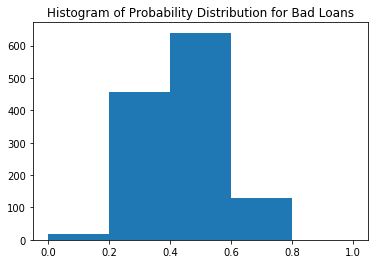

In [45]:
plt.hist(Bad_Loan_Probability_Distribution, bins = [0,0.2,0.4,0.6,0.8,1])
plt.title("histogram") 
plt.title('Histogram of Probability Distribution for Bad Loans')
plt.show()

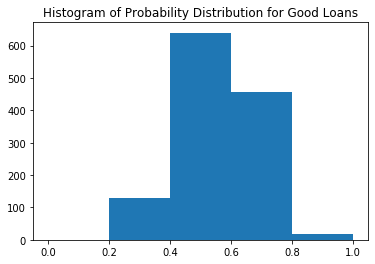

In [46]:
plt.hist(Good_Loan_Probability_Distribution, bins = [0,0.2,0.4,0.6,0.8,1])
plt.title("histogram") 
plt.title('Histogram of Probability Distribution for Good Loans')
plt.show()

# 5. Analysis on Rejected Data

In [47]:
Rejected_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,title_loan,pay_advances,total_loan_payments,no_of_other_active_loans,traditional_single_payment_mean,traditional_single_payment_trend,loan_amount,loan_requested,state,status
0,952.00,0.0000,238.0,0.0000,0.0,0.0,0.000,180,5.0,1,...,0.0,0.0,0.0,0,0.0,0.0,200,200,1,0
1,0.00,0.0000,0.0,0.0000,0.0,0.0,0.000,0,0.0,0,...,0.0,0.0,72.0,1,9.0,0.0,500,500,9,0
2,2095.94,0.0000,0.0,0.0000,0.0,0.0,523.985,9,3.0,1,...,0.0,0.0,0.0,0,0.0,0.0,300,300,10,0
3,7368.99,0.0000,5.0,1837.2475,0.0,0.0,0.000,177,5.5,3,...,0.0,0.0,0.0,1,0.0,0.0,255,255,1,0
4,2178.57,311.1425,233.5,0.0000,0.0,0.0,0.000,54,18.5,2,...,0.0,0.0,250.0,1,0.0,0.0,250,250,10,0


In [48]:
#Looking for the features from the previous test set
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145 entries, 0 to 4144
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Balance_Low_Than_Loan          4145 non-null   int64  
 1   Monthly_Window_Less_Paid_Cust  4145 non-null   int64  
 2   Low_Income_Salaried_Customer   4145 non-null   int64  
 3   return_transactions            4145 non-null   int64  
 4   Threshold_Cust                 4145 non-null   int64  
 5   bank_balance                   4145 non-null   float64
 6   Mortgage_Flag                  4145 non-null   int64  
 7   Avg_Salary_Per_Source          4145 non-null   float64
 8   Monthly_Income_Bins            4145 non-null   int64  
 9   Avg_Income_By_Per_Source       4145 non-null   float64
 10  Percent_Amount_Approved        4145 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 356.3 KB


In [49]:
#Generating Same Features as Approved Data to use in our prediction models.
# I will generate only those features I have used in model training
Rejected_Data['Balance_Low_Than_Loan']=Rejected_Data.apply(lambda x: Balance_Low_Than_Loan(x.loan_amount,x.bank_balance),axis=1)
Rejected_Data['Monthly_Window_Less_Paid_Cust']=Rejected_Data.apply(lambda x: Monthly_Window_Less_Paid_Cust(x.days_since_most_recent_payroll,x.days_until_next_payroll,x.loan_requested,x.loan_amount),axis=1)
Rejected_Data['Monthly_Income_Bins']=Rejected_Data.apply(lambda x: Monthly_Income_Bins(x.monthly_income),axis=1)
Rejected_Data['Low_Income_Salaried_Customer']=Rejected_Data.apply(lambda x: Low_Income_Salaried_Customer(x.Monthly_Income_Bins,x.income_length),axis=1)
Rejected_Data['Threshold_Cust']=Rejected_Data.apply(lambda x: Threshold_Cust(x.monthly_income,x.bank_balance,x.total_loan_payments),axis=1)
Rejected_Data['Mortgage_Flag']=Rejected_Data.apply(lambda x: Mortgage_Flag(x.mortgage),axis=1)
Rejected_Data['Avg_Salary_Per_Source']=Rejected_Data.apply(lambda x: Avg_Salary_Per_Source(x.monthly_income,x.income_sources),axis=1)
Rejected_Data['Avg_Income_By_Per_Source']=Rejected_Data.apply(lambda x: Avg_Income_By_Per_Source(x.monthly_income,x.income_sources),axis=1)
Rejected_Data.fillna(0)
Rejected_Data['Percent_Amount_Approved']=Rejected_Data.apply(lambda x: Percent_Amount_Approved(x.loan_amount,x.loan_requested),axis=1)
Rejected_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,status,Balance_Low_Than_Loan,Monthly_Window_Less_Paid_Cust,Monthly_Income_Bins,Low_Income_Salaried_Customer,Threshold_Cust,Mortgage_Flag,Avg_Salary_Per_Source,Avg_Income_By_Per_Source,Percent_Amount_Approved
0,952.00,0.0000,238.0,0.0000,0.0,0.0,0.000,180,5.0,1,...,0,1,0,0,1,0,0,952.000,952.000,1.0
1,0.00,0.0000,0.0,0.0000,0.0,0.0,0.000,0,0.0,0,...,0,1,0,0,0,1,0,0.000,0.000,1.0
2,2095.94,0.0000,0.0,0.0000,0.0,0.0,523.985,9,3.0,1,...,0,1,0,2,0,0,0,2095.940,2095.940,1.0
3,7368.99,0.0000,5.0,1837.2475,0.0,0.0,0.000,177,5.5,3,...,0,1,0,4,0,0,0,2456.330,2456.330,1.0
4,2178.57,311.1425,233.5,0.0000,0.0,0.0,0.000,54,18.5,2,...,0,1,0,2,0,0,0,1089.285,1089.285,1.0


In [50]:
#Creating Copy for ANN
Rejected_Data_ANN=Rejected_Data.copy(deep=True)

In [51]:
#Collecting Only Required Features from the Dataset
Rejected_Data_Test=Rejected_Data[['Balance_Low_Than_Loan','Monthly_Window_Less_Paid_Cust','Low_Income_Salaried_Customer',
                                'return_transactions','Threshold_Cust','bank_balance','Mortgage_Flag',
                                 'Avg_Salary_Per_Source','Monthly_Income_Bins','Avg_Income_By_Per_Source',
                                 'Percent_Amount_Approved']]

In [52]:
#Scaling data with Standard Scalar
Rejected_Data_Test_Scaled = pd.DataFrame(Stan_Scalar.fit_transform(Rejected_Data_Test),columns = Rejected_Data_Test.columns)
Rejected_Data_Test_Scaled.head()

,Balance_Low_Than_Loan,Monthly_Window_Less_Paid_Cust,Low_Income_Salaried_Customer,return_transactions,Threshold_Cust,bank_balance,Mortgage_Flag,Avg_Salary_Per_Source,Monthly_Income_Bins,Avg_Income_By_Per_Source,Percent_Amount_Approved
0,0.306262,-0.138385,2.383831,-0.296939,-0.356468,-0.049205,-0.078662,-0.052136,-0.843511,-0.052136,0.144518
1,0.306262,-0.138385,-0.419493,1.687400,2.805298,-0.016406,-0.078662,-0.862495,-0.843511,-0.862495,0.144518
2,0.306262,-0.138385,-0.419493,-0.296939,-0.356468,-0.154747,-0.078662,0.921606,0.465239,0.921606,0.144518
3,0.306262,-0.138385,-0.419493,1.356677,-0.356468,-0.267714,-0.078662,1.228376,1.773990,1.228376,0.144518
4,0.306262,-0.138385,-0.419493,1.356677,-0.356468,-0.016055,-0.078662,0.064723,0.465239,0.064723,0.144518


Approach:
1. Northstar matrix for most finance institute is to catch maximum loan defaulters.
2. As there is limit for maximum loan ammount, we won't face a situation where we are rejecting potential huge loan application due to focusing on bad loans.
3. My primary goal is to catch maximum bad loans while preserving good numbers of good loans. Thus I'm using Voting Classifier for prediction.
4. I'm having prediction more centered towards Bad Loans.

In [53]:
Rejected_Data_Predictions=clf.predict(Rejected_Data_Test_Scaled)

#Calculating probability for each application. Depending on business requirement, we can decide 
Bad_Loan_Probability_Rejected=clf.predict_proba(Rejected_Data_Test_Scaled)[:,0]
Good_Loan_Probability_Rejected=clf.predict_proba(Rejected_Data_Test_Scaled)[:,1]

Rejected_Data['Estimated_Predictions']=Rejected_Data_Predictions
Rejected_Data['Bad_Loan_Probability']=Bad_Loan_Probability_Rejected
Rejected_Data['Good_Loan_Probability']=Good_Loan_Probability_Rejected

#Checking what could have been potential good loans in our rejected dataset
print("Potential Bad and Good Loans in Rejected Applications")
Rejected_Data['Estimated_Predictions'].value_counts()

Potential Bad and Good Loans in Rejected Applications


0    1737
1    1190
Name: Estimated_Predictions, dtype: int64

In [54]:
Rejected_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,Monthly_Income_Bins,Low_Income_Salaried_Customer,Threshold_Cust,Mortgage_Flag,Avg_Salary_Per_Source,Avg_Income_By_Per_Source,Percent_Amount_Approved,Estimated_Predictions,Bad_Loan_Probability,Good_Loan_Probability
0,952.00,0.0000,238.0,0.0000,0.0,0.0,0.000,180,5.0,1,...,0,1,0,0,952.000,952.000,1.0,0,0.558862,0.441138
1,0.00,0.0000,0.0,0.0000,0.0,0.0,0.000,0,0.0,0,...,0,0,1,0,0.000,0.000,1.0,1,0.406909,0.593091
2,2095.94,0.0000,0.0,0.0000,0.0,0.0,523.985,9,3.0,1,...,2,0,0,0,2095.940,2095.940,1.0,0,0.634228,0.365772
3,7368.99,0.0000,5.0,1837.2475,0.0,0.0,0.000,177,5.5,3,...,4,0,0,0,2456.330,2456.330,1.0,0,0.633428,0.366572
4,2178.57,311.1425,233.5,0.0000,0.0,0.0,0.000,54,18.5,2,...,2,0,0,0,1089.285,1089.285,1.0,0,0.619633,0.380367


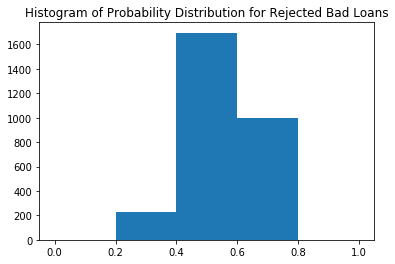

In [55]:
plt.hist(Bad_Loan_Probability_Rejected, bins = [0,0.2,0.4,0.6,0.8,1])
plt.title("histogram") 
plt.title('Histogram of Probability Distribution for Rejected Bad Loans')
plt.show()

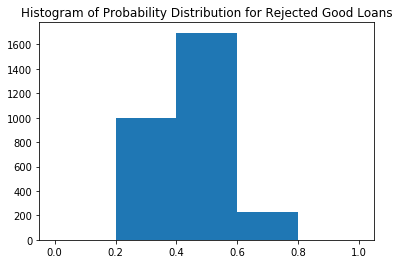

In [56]:
plt.hist(Good_Loan_Probability_Rejected, bins = [0,0.2,0.4,0.6,0.8,1])
plt.title("histogram") 
plt.title('Histogram of Probability Distribution for Rejected Good Loans')
plt.show()

In [57]:
percent_good_loan_rejected=len(Rejected_Data[Rejected_Data['Estimated_Predictions']==1])/len(Rejected_Data)
print("% of potential good loans are",percent_good_loan_rejected)

% of potential good loans are 0.40655961735565427


In [58]:
#Exporting final file for further analysis by marketin team
Rejected_Data.to_csv('Potential_Good_Loans_In_Rejected_List.csv', encoding='utf-8')

# 6. Financial Analysis

Approach:
1. For financial calculation I'm considering APR 250%.
2. Considering my results are correct, I am considering, 57% of rejected loan could have been potential good loans.
3. Money lost will be, loan amount by missed bad loans+interest amount by missed good loans
4. Money saved will be loan amount by correctly identified bad loans+57% of the times the interest amount from good loan
5. Final profit is difference between Money lost and Money Saved.


In [59]:
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,Biweekly_Candidate,Mortgage_Flag,Monthly_Income_Bins,Low_Income_Salaried_Customer,Balance_Low_Than_Loan,Balance_Low_Than_Income,Potential_Risky_Customer,Avg_Salary_Per_Source,Monthly_Window_Less_Paid_Cust,Threshold_Cust
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,1,0,0,1,1,1,1,881.44,0,0
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,1,0,2,0,1,1,1,806.19,1,0
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,0,0,0,0,1,0,0,0.00,0,0
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0,0,2,0,1,1,1,1510.51,1,0
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,0,0,0,1,1,1,1,124.00,1,0


In [60]:
X_F=Approved_Data[['loan_amount','monthly_income']]
Y_F=Approved_Data['status']

In [61]:
X_Train_F, X_Test_F, Y_Train_F, Y_Test_F = train_test_split(X_F
                                                    , Y_F, test_size=0.3,stratify=Y, random_state=42)

In [62]:
X_Test_F.head()

,loan_amount,monthly_income
2981,250,2362.13
1904,250,1900.00
1662,100,1982.07
3699,200,3420.26
398,300,2469.19


In [108]:
X_Test_F['Predicted_Status']=Voting_Pred
X_Test_F['Actual_Status']=Y_Test_F

In [64]:
X_Test_F.head()

,loan_amount,monthly_income,Predicted_Status,Actual_Status
2981,250,2362.13,0,1
1904,250,1900.00,0,1
1662,100,1982.07,1,1
3699,200,3420.26,1,1
398,300,2469.19,1,1


In [65]:
#Confirming the actual counts and predicted counts with confusion matrix of voting classifier
print("Count of Predicted Status")
print(X_Test_F['Predicted_Status'].value_counts())
print("\n")
print("Count of Actual Status")
print(X_Test_F['Actual_Status'].value_counts())
pd.crosstab(Y_Test,Voting_Pred,rownames=['True'], colnames=['Predicted'],margins=True)

Count of Predicted Status
1    770
0    474
Name: Predicted_Status, dtype: int64


Count of Actual Status
1    996
0    248
Name: Actual_Status, dtype: int64


Predicted,0,1,All
True,,,
0,122,126,248
1,352,644,996
All,474,770,1244


In [66]:
X_Test_F.head()

,loan_amount,monthly_income,Predicted_Status,Actual_Status
2981,250,2362.13,0,1
1904,250,1900.00,0,1
1662,100,1982.07,1,1
3699,200,3420.26,1,1
398,300,2469.19,1,1


In [109]:
#Calculating_Finincial_Impact
def Money_Saved(loan_amount,Predicted_Status,Actual_Status):
    #Setting Default value as 0
    output=0
    if Predicted_Status==Actual_Status:
        if Actual_Status==0:
            output=loan_amount+((loan_amount*(250)*(0.167))/100)
    else:
        output= 0
        
    return output

def Money_Lost(loan_amount,Predicted_Status,Actual_Status):
    #Setting Default value as 0
    output=0
    if Predicted_Status!=Actual_Status:
        if Actual_Status==0:
            output=loan_amount
        elif Actual_Status==1:
            output= ((loan_amount*(250)*(0.167))/100)
    else:
        output= 0
        
    return output


X_Test_F['Money_Saved']=X_Test_F.apply(lambda x: Money_Saved(x.loan_amount,x.Predicted_Status,x.Actual_Status),axis=1)
X_Test_F['Money_Lost']=X_Test_F.apply(lambda x: Money_Lost(x.loan_amount,x.Predicted_Status,x.Actual_Status),axis=1)

X_Test_F.head()

,loan_amount,monthly_income,Predicted_Status,Actual_Status,Money_Saved,Money_Lost
2981,250,2362.13,0,1,0.0,104.375
1904,250,1900.00,0,1,0.0,104.375
1662,100,1982.07,1,1,0.0,0.000
3699,200,3420.26,1,1,0.0,0.000
398,300,2469.19,1,1,0.0,0.000


In [68]:
print("Total Money Lost", X_Test_F['Money_Lost'].sum())
print("Total Money Saved", X_Test_F['Money_Saved'].sum())

print("Net_Profit", X_Test_F['Money_Saved'].sum()-X_Test_F['Money_Lost'].sum())

Total Money Lost 50351.925
Total Money Saved 31376.362500000003
Net_Profit -18975.5625


# 6. Deep Learning Approach: ANN 

### This Work is performed after 4 hours of Time Window. This took some research and help from internet

In [110]:
import keras
from keras import Sequential
from keras.layers import Dense

In [70]:
Approved_Data.head()

,monthly_income,gig_economy_weekly_income,atm_check_deposits_weekly_income,direct_deposit_weekly_income,government_aid_weekly_income,frequency_heuristic_weekly_income,large_deposits_weekly_income,income_length,payrolls_per_month,income_sources,...,Biweekly_Candidate,Mortgage_Flag,Monthly_Income_Bins,Low_Income_Salaried_Customer,Balance_Low_Than_Loan,Balance_Low_Than_Income,Potential_Risky_Customer,Avg_Salary_Per_Source,Monthly_Window_Less_Paid_Cust,Threshold_Cust
0,881.44,0.0,0.0,220.360,0.0,0.0000,0.0,174,2.166667,1,...,1,0,0,1,1,1,1,881.44,0,0
1,1612.38,0.0,0.0,346.845,0.0,56.2500,0.0,206,4.850000,2,...,1,0,2,0,1,1,1,806.19,1,0
2,0.00,0.0,0.0,0.000,0.0,0.0000,0.0,0,0.000000,0,...,0,0,0,0,1,0,0,0.00,0,0
3,1510.51,0.0,0.0,0.000,0.0,377.6275,0.0,16,2.000000,1,...,0,0,2,0,1,1,1,1510.51,1,0
4,620.00,0.0,155.0,0.000,0.0,0.0000,0.0,131,17.750000,5,...,0,0,0,1,1,1,1,124.00,1,0


In [71]:
y = Approved_Data['status']
X = Approved_Data.loc[:, Approved_Data.columns != 'status']
del X['state']

In [72]:
X=X.fillna(0)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X=X.fillna(0)

In [73]:
features = np.array(X, dtype="float32")
targets = np.array(y, dtype="uint8")

print("features.shape:", features.shape)
print("targets.shape:", targets.shape)

features.shape: (4145, 46)
targets.shape: (4145,)


In [74]:
# TRAINING TEST SPLIT

In [75]:
num_val_samples = int(len(features) * 0.20)
train_features = features[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_features = features[-num_val_samples:]
val_targets = targets[-num_val_samples:]

print("Number of training samples:", len(train_features))
print("Number of validation samples:", len(val_features))

Number of training samples: 3316
Number of validation samples: 829


In [76]:
# HANDLE CLASS IMBALANCE BY MANUALLY DEFINING THE WIEGHTS

In [77]:
counts = np.bincount(train_targets[:,])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 2647 (79.83% of total)


In [78]:
# Normalizing The Data

In [79]:
mean = np.mean(train_features, axis=0)
train_features -= mean
val_features -= mean
std = np.std(train_features, axis=0)
train_features /= std
val_features /= std

In [80]:
# Binary classification model

In [81]:
model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(train_features.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               12032     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 143,873
Trainable params: 143,873
Non-trainable params: 0
________________________________________________

In [82]:
# Train the model with calculated Weights to HANDLE IMBALANCE

In [111]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

model.fit(
    train_features,
    train_targets,
    batch_size=2048,
    epochs=50,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
)

Train on 3316 samples, validate on 829 samples
Epoch 1/50
 - 0s - loss: 1.3458e-04 - fn: 181.0000 - fp: 70.0000 - tn: 599.0000 - tp: 2466.0000 - precision: 0.9724 - recall: 0.9316 - val_loss: 1.8207 - val_fn: 372.0000 - val_fp: 57.0000 - val_tn: 102.0000 - val_tp: 298.0000 - val_precision: 0.8394 - val_recall: 0.4448
Epoch 2/50
 - 0s - loss: 2.7044e-04 - fn: 801.0000 - fp: 43.0000 - tn: 626.0000 - tp: 1846.0000 - precision: 0.9772 - recall: 0.6974 - val_loss: 1.0583 - val_fn: 86.0000 - val_fp: 121.0000 - val_tn: 38.0000 - val_tp: 584.0000 - val_precision: 0.8284 - val_recall: 0.8716
Epoch 3/50
 - 0s - loss: 1.5150e-04 - fn: 152.0000 - fp: 97.0000 - tn: 572.0000 - tp: 2495.0000 - precision: 0.9626 - recall: 0.9426 - val_loss: 1.1174 - val_fn: 186.0000 - val_fp: 88.0000 - val_tn: 71.0000 - val_tp: 484.0000 - val_precision: 0.8462 - val_recall: 0.7224
Epoch 4/50
 - 0s - loss: 1.8540e-04 - fn: 424.0000 - fp: 55.0000 - tn: 614.0000 - tp: 2223.0000 - precision: 0.9759 - recall: 0.8398 - val_

Epoch 31/50
 - 0s - loss: 5.2893e-05 - fn: 82.0000 - fp: 31.0000 - tn: 638.0000 - tp: 2565.0000 - precision: 0.9881 - recall: 0.9690 - val_loss: 1.8656 - val_fn: 131.0000 - val_fp: 117.0000 - val_tn: 42.0000 - val_tp: 539.0000 - val_precision: 0.8216 - val_recall: 0.8045
Epoch 32/50
 - 0s - loss: 5.6278e-05 - fn: 123.0000 - fp: 20.0000 - tn: 649.0000 - tp: 2524.0000 - precision: 0.9921 - recall: 0.9535 - val_loss: 1.9335 - val_fn: 147.0000 - val_fp: 111.0000 - val_tn: 48.0000 - val_tp: 523.0000 - val_precision: 0.8249 - val_recall: 0.7806
Epoch 33/50
 - 0s - loss: 5.6221e-05 - fn: 118.0000 - fp: 25.0000 - tn: 644.0000 - tp: 2529.0000 - precision: 0.9902 - recall: 0.9554 - val_loss: 1.8977 - val_fn: 128.0000 - val_fp: 110.0000 - val_tn: 49.0000 - val_tp: 542.0000 - val_precision: 0.8313 - val_recall: 0.8090
Epoch 34/50
 - 0s - loss: 5.2756e-05 - fn: 99.0000 - fp: 20.0000 - tn: 649.0000 - tp: 2548.0000 - precision: 0.9922 - recall: 0.9626 - val_loss: 1.8367 - val_fn: 142.0000 - val_fp: 1

In [84]:
# Predicting On Validation Data

In [85]:
y_pred=model.predict_classes(val_features)

In [86]:
# Confusion Metrics

In [87]:
cm = confusion_matrix(val_targets, y_pred)
print(cm)

[[ 52 107]
 [125 545]]


In [88]:
# F1 Scores

In [89]:
print(classification_report(val_targets, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.33      0.31       159
           1       0.84      0.81      0.82       670

    accuracy                           0.72       829
   macro avg       0.56      0.57      0.57       829
weighted avg       0.73      0.72      0.73       829



In [90]:
#Regenerating few additional variables on Rejected Data File

In [91]:
Rejected_Data_ANN['Total_Debt_To_Income']=Rejected_Data_ANN.apply(lambda x: Total_Debt_To_Income(x.monthly_income,x.total_loan_payments),axis=1)
Rejected_Data_ANN['Overdraft_NSF_Flag']=Rejected_Data_ANN.apply(lambda x: Overdraft_NSF_Flag(x.overdraft_transactions,x.nsf_transactions),axis=1)
Rejected_Data_ANN['Biweekly_Candidate']=Rejected_Data_ANN.apply(lambda x: Biweekly_Candidate(x.days_since_most_recent_payroll,x.days_until_next_payroll),axis=1)
Rejected_Data_ANN['Balance_Low_Than_Income']=Rejected_Data_ANN.apply(lambda x: Balance_Low_Than_Income(x.monthly_income,x.bank_balance),axis=1)
Rejected_Data_ANN['Potential_Risky_Customer']=Rejected_Data_ANN.apply(lambda x: Potential_Risky_Customer(x.Balance_Low_Than_Loan,x.Balance_Low_Than_Income),axis=1)

In [92]:
del Rejected_Data_ANN['status']
del Rejected_Data_ANN['state']

In [93]:
# Normalizing Rejected Data

In [94]:
mean = np.mean(Rejected_Data_ANN, axis=0)
Rejected_Data_ANN -= mean
std = np.std(Rejected_Data_ANN, axis=0)
Rejected_Data_ANN /= std

In [95]:
# Predicting Classes on Rejected Data

In [96]:
y_pred_rejected =model.predict_classes(Rejected_Data_ANN)

In [97]:
y_pred_rejected_df = pd.DataFrame(y_pred_rejected,columns = ['PredictedStatus'])

In [98]:
y_pred_rejected_df['PredictedStatus'].value_counts()

1    2191
0     736
Name: PredictedStatus, dtype: int64

In [99]:
# Predicting Probabilities on Rejected Data

In [100]:
y_pred_rejected_prob=model.predict(Rejected_Data_ANN)

In [104]:
y_pred_rejected_prob_df = pd.DataFrame(y_pred_rejected_prob,columns = ['PredictedProbabilities']) 

In [105]:
y_pred_rejected_prob_df.head()

,PredictedProbabilities
0,0.813571
1,0.189632
2,0.360220
3,0.999988
4,0.999926


#CONCLUSION:
1. I have worked on explaining two main approaches for the given data with respect to my understanding of the business model.

2. Traditional Machine Learning approach which focuses mainly on the use of Feature Engineering, Balancing the Minority Samples and having the explanatory power to understand the prediction of Good vs Bad Loan.
    a. Feature Engineering: New variables creation(Applying Business Sense)
    b. Measuring Variables: Pearsons Correlation
    c. Balancing Minority Class: Using ADASYN
    d. Predicting Classes: Using traditional tree based models, Hyper parameter optimization and Ensemble learning.
    
3. Potential Financial Analysis: Our main goal is to optimize Revenue( Interest from Good Loans) and minimize the Loss (Default from Bad Loans). Used the Voting classifier to gauge the Financial Impact of using the Model.

4. Predictions for Rejected Data: Used our optimized voting classifier for predicting on Rejected(Unseen Data). Calculated probabilities of a Loan for being Good or Bad which can be useful for Manual review.

5. Results of Voting Classifier: Observed that the classifier tends to be performing better for Identifying Bad Loans. It is following conservational approach of minimizing the LOSS(Default Loan) but compromising on the Revenue(Interest earned from Good Loan).

6. Deep Learning Approach which focuses mainly on using complex layers to identify the hidden pattern in the dataset. 
    a.Feature Engineering: Used features generated for  Traditional ML Models.
    b. Adjusted Class Imbalance by preassigning weights to optimize the gradient.
    
7. Results of the Deep Learning Classifier: This model tends to be performing as expected because the predictions follow the distribution of the original(ie Approved) Dataset. 
   a. Model is more balanced as compared to Traditional Ensemble voting classifier. 
   b. Model is focusing on Good Loan Customers as it is optimized for Revenue.
   c. Provided more data we can increase the Models performance.
   d. Provided Probabilities of a customer being a good loan ie 
      IF probability value < 0.5 : BAD LOAN
      IF probability value > 0.5 : GOOD LOAN
      
8. The measure which I used to look at the Both Models performance is F1 score as it creates a balance between precision and recall.

9. There is no good or bad Approach in the above analysis. It all depends on the business model( More risk more Gain vice versa Low Risk Low Gain)

10. Ideally I would be using a ML model in combination with a Rule Based Approach or Human Approval in case of discrepancies. 


Submitted By: Sudesh V Khillare